Total Images: 477
Total Labels: 477
Epoch 1/20
10/10 [==============================] - 73s 7s/step - loss: 4.6094 - accuracy: 0.6000 - val_loss: 1.5047 - val_accuracy: 0.5658
Epoch 2/20
10/10 [==============================] - 70s 7s/step - loss: 0.7003 - accuracy: 0.7344 - val_loss: 0.8592 - val_accuracy: 0.6974
Epoch 3/20
10/10 [==============================] - 73s 7s/step - loss: 0.4677 - accuracy: 0.8262 - val_loss: 0.5189 - val_accuracy: 0.8553
Epoch 4/20
10/10 [==============================] - 75s 8s/step - loss: 0.3044 - accuracy: 0.8852 - val_loss: 0.3906 - val_accuracy: 0.8947
Epoch 5/20
10/10 [==============================] - 78s 8s/step - loss: 0.2535 - accuracy: 0.9213 - val_loss: 0.3485 - val_accuracy: 0.8947
Epoch 6/20
10/10 [==============================] - 76s 8s/step - loss: 0.1931 - accuracy: 0.9344 - val_loss: 0.2637 - val_accuracy: 0.9211
Epoch 7/20
10/10 [==============================] - 79s 8s/step - loss: 0.1546 - accuracy: 0.9541 - val_loss: 0.2653 - val_a

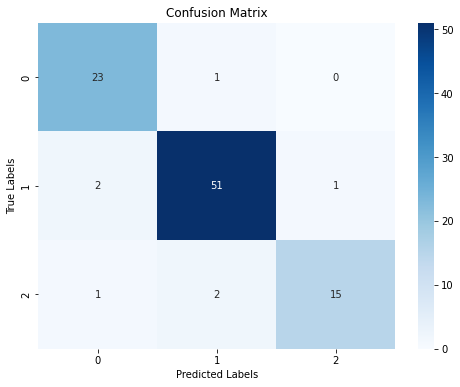

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the folder containing the image folders
image_folder_path = r"S:\JOB Hunt\Accesia\Filterd im edited"

# Function to load and preprocess the images
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in os.listdir(folder):
        class_folder_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(class_folder)
    print("Total Images:", len(images))
    print("Total Labels:", len(labels))
    return np.array(images), np.array(labels)

# Load the images and labels
images, labels = load_images_from_folder(image_folder_path)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate augmented training data
train_generator = datagen.flow(X_train, y_train, subset='training')
validation_generator = datagen.flow(X_train, y_train, subset='validation')

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_true_labels = label_encoder.inverse_transform(y_test)

# Compute classification metrics
classification_accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Classification Accuracy:", classification_accuracy)

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

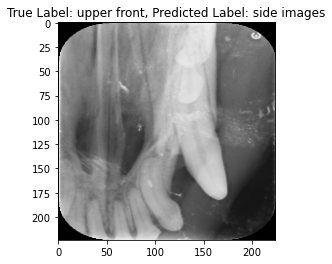

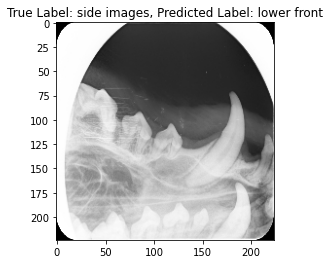

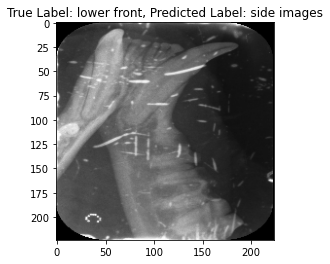

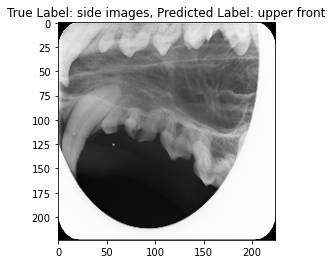

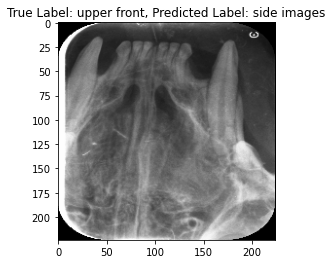

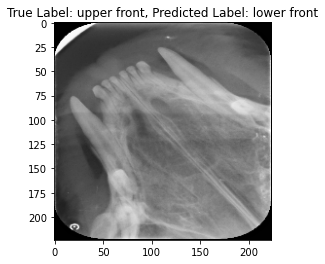

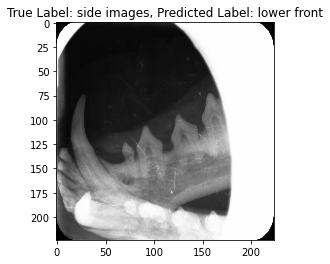

Total Misclassified Images: 7


In [2]:
from tensorflow.keras.preprocessing.image import array_to_img

misclassified_indices = np.nonzero(y_pred_labels != y_true_labels)[0]
misclassified_images = X_test[misclassified_indices]
misclassified_true_labels = y_true_labels[misclassified_indices]
misclassified_pred_labels = y_pred_labels[misclassified_indices]

for i in range(len(misclassified_images)):
    misclassified_image = array_to_img(misclassified_images[i])
    plt.imshow(misclassified_image)
    plt.title(f'True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}')
    plt.show()

print("Total Misclassified Images:", len(misclassified_indices))


Total Images: 477
Total Labels: 477
Epoch 1/20
10/10 [==============================] - 33s 3s/step - loss: 0.0216 - accuracy: 0.4754 - val_loss: 0.7729 - val_accuracy: 0.6316
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: 0.0051 - accuracy: 0.7475 - val_loss: 0.4600 - val_accuracy: 0.8421
Epoch 3/20
10/10 [==============================] - 36s 4s/step - loss: 0.0033 - accuracy: 0.8328 - val_loss: 0.6808 - val_accuracy: 0.7368
Epoch 4/20
10/10 [==============================] - 36s 4s/step - loss: 0.0023 - accuracy: 0.9082 - val_loss: 0.2805 - val_accuracy: 0.8947
Epoch 5/20
10/10 [==============================] - 37s 4s/step - loss: 0.0019 - accuracy: 0.8852 - val_loss: 0.5137 - val_accuracy: 0.8421
Epoch 6/20
10/10 [==============================] - 37s 4s/step - loss: 0.0019 - accuracy: 0.8984 - val_loss: 0.2492 - val_accuracy: 0.9079
Epoch 7/20
10/10 [==============================] - 39s 4s/step - loss: 0.0018 - accuracy: 0.9049 - val_loss: 0.2390 - val_a

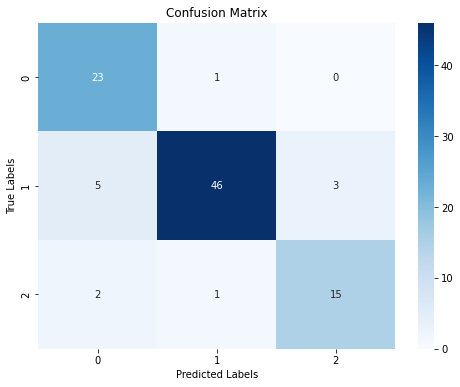

In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the folder containing the image folders
image_folder_path = r"S:\JOB Hunt\Accesia\Filterd im edited"

# Function to load and preprocess the images
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in os.listdir(folder):
        class_folder_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(class_folder)
    print("Total Images:", len(images))
    print("Total Labels:", len(labels))
    return np.array(images), np.array(labels)

# Load the images and labels
images, labels = load_images_from_folder(image_folder_path)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Calculate class weights
class_weights = dict(zip(np.unique(y_train), (1 / np.bincount(y_train))))

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate augmented training data
train_generator = datagen.flow(X_train, y_train, subset='training')
validation_generator = datagen.flow(X_train, y_train, subset='validation')

# Train the model with class weights
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, class_weight=class_weights)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_true_labels = label_encoder.inverse_transform(y_test)

# Compute classification metrics
classification_accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Classification Accuracy:", classification_accuracy)

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
